In [1]:
from math import floor, log
import numpy as np
import sympy
from matplotlib import pyplot as plt

# **Задание 1**

In [2]:
%%latex
$\displaystyle i)
\int_0^1 \frac{x^n}{x+\alpha}dx =
\int_0^1 \frac{x^n + \alpha x^{n-1} - \alpha x^{n-1}}{x+\alpha}dx =
\int_0^1 \frac{x^{n-1}(x + \alpha)}{x+\alpha} -
\int_0^1 \frac{\alpha x^{n-1}}{x+\alpha}dx = \\
\displaystyle = \int_0^1 x^{n-1} - \alpha \int_0^1 \frac{x^{n-1}}{x+\alpha}dx =
\frac{1}{n} - \alpha \int_0^1 \frac{x^{n-1}}{x+\alpha}dx \\
\displaystyle I_n(\alpha) = \frac{1}{n} - \alpha I_{n-1}(\alpha)$

<IPython.core.display.Latex object>

In [3]:
%%latex
$\displaystyle ii)
I_0(\alpha)=
\int_0^1 \frac{x^0}{x+\alpha}dx = 
\int_0^1 \frac{1}{x+\alpha}dx =  
ln(x+\alpha) \bigg|_0^1 =
ln(1+\alpha) - ln(\alpha)$

<IPython.core.display.Latex object>

In [4]:
def upwards_recursion(n, alpha):
  if n == 0:
    return log(1 + alpha) - log(alpha)
  return 1/n - alpha * upwards_recursion(n - 1, alpha)

In [5]:
%%latex
$\displaystyle
I_{n-1} = \frac{1}{\alpha} \left( \frac{1}{n} - I_n(\alpha) \right)$

<IPython.core.display.Latex object>

In [6]:
def downwards_recursion(n, alpha):
  if n == 100:
    return 0
  return 1/alpha * (1/n - downwards_recursion(n + 1, alpha))

In [7]:
x = sympy.Symbol('x')

### $\displaystyle
I_{25}(0.1)$

In [8]:
print("Результат рекурсией вверх: \t{0}\n\
Результат рекурсией вниз: \t{1}\n\
Точное значение: \t\t{2}".format(
    upwards_recursion(25, 0.1),
    downwards_recursion(25, 0.1),
    float(sympy.integrate(x**25 / (x + 0.1), (x, 0, 1)))
    )
)

Результат рекурсией вверх: 	0.03622697090911682
Результат рекурсией вниз: 	9.174234068714559e+72
Точное значение: 		0.036226970909116835


### $\displaystyle
I_{25}(10)$

In [9]:
print("Результат рекурсией вверх: \t{0}\n\
Результат рекурсией вниз: \t{1}\n\
Точное значение: \t\t{2}".format(
    upwards_recursion(25, 10),
    downwards_recursion(25, 10),
    float(sympy.integrate(x**25 / (x + 10), (x, 0, 1)))
    )
)

Результат рекурсией вверх: 	916988169.5363449
Результат рекурсией вниз: 	0.003649164659031803
Точное значение: 		0.0035083534096819772


В случае $\alpha < 1$ ошибка в формуле рекурсии вверх почти не нарастает, так как она каждый шаг умножается на число меньше единицы. В случае $\alpha > 1$ лучше использовать формулу рекурсии вниз, так как там каждый шаг интеграл умножается на число $\frac{1}{\alpha} < 1$ 

# **Задание 2**

In [10]:
%%latex
$\displaystyle
a_n = -a_{n-1} + 6 a_{n-2}\\
\lambda^n = -\lambda^{n-1} + 6 \lambda^{n-2}\\
\lambda^2 + \lambda - 6 = 0\\
D = 1^2 - 4 * 1 * (-6) = 25\\
\lambda_{1,2} = \frac{-1 \pm \sqrt{25}}{2 * 1} = \frac{-1 \pm 5}{2} = 2, -3\\
p_n = C_1 2^n + C_2 (-3)^n\\
p_0 = 1 \Rightarrow C_1 + C_2 = 1\\
p_1 = 2 \Rightarrow 2C_1 - 3C_2 = 2\\
5C_1 - 3C_1 - 3C_2 = 2\\
5C_1 - 3 = 2\\
5C_1 = 5\\
C_1 = 1, C_2 = 0\\
p_n = 2^n
$

<IPython.core.display.Latex object>

$\displaystyle
recur(2021) = 2^{2021}$


In [11]:
%%latex
$\displaystyle
p_n = C_1 2^n + C_2 (-3)^n\\
p_0 = 1 \Rightarrow C_1 + C_2 = 1\\
p_1 = 2 + \epsilon \Rightarrow 2C_1 - 3C_2 = 2  + \epsilon\\
5C_1 = 5 + \epsilon\\
C_1 = 1 + \epsilon / 5, C_2 = -\epsilon / 5\\
p_n = (1 + \epsilon / 5) 2^n - \epsilon / 5 (-3)^n
$

<IPython.core.display.Latex object>

$\displaystyle
recur(2021, a1=2+\epsilon) = (1 + \epsilon / 5) 2^{2021} + (\epsilon / 5) 3^{2021}$


Малое изменение ко второму элементу рекурсии сильно влияет на её эволюцию: при нечётных n оно будет значительно больше чем предыдущий вариант с $p_1 = 2$, а при чётных достаточно больших n результат будет отрицательным

# **Задание 3**

In [12]:
%%latex
$\begin{vmatrix}
1 - \lambda & 10 \\
\delta & 1 - \lambda \\
\end{vmatrix}

= (1 - \lambda)^2 - 10\delta = 0 \\
(1 - \lambda)^2 = 10\delta \\
1 - \lambda = \pm \sqrt{10\delta} \\
\lambda_{1, 2} = 1 \mp \sqrt{10\delta} \\
\epsilon(\delta) = 1 + \sqrt{10\delta} \\
\kappa(\delta) = \frac{d\epsilon(\delta)}{d\delta} =
\frac{d(1 + \sqrt{10\delta})}{d\delta} =
\frac{\sqrt{10}}{2\sqrt{\delta}} \\
\kappa(10) = \frac{1}{2} \\
\kappa(0.1) = 5
$

<IPython.core.display.Latex object>

# **Задание 4**

In [13]:
import math
def round_to_n(x, n):
  if x == 0:
    return x
  else:
    return round (x , -int(math.floor(math.log10(abs(x)))) + (n - 1))

In [14]:
print(
    round_to_n(2.1862, 2),
    round_to_n(47815.3, 3),
    round_to_n(0.00000019500, 2),
    round_to_n(0.000019500, 2),
    sep='\n'
)

2.2
47800.0
2e-07
1.9e-05


$\displaystyle \sum_{i=1}^{3000}k^{-2}\approx1.6446$

In [15]:
exact_answer = 0
for k in range (3000, 0, -1):
  exact_answer += 1 / k**2
print(exact_answer)

1.6446007890642758


In [16]:
sum = 0
for k in range (1, 3001):
  sum = round_to_n(sum + 1 / k**2, 4)
print('{0}\n{1:.5%}'.format(sum, abs(exact_answer - sum) / exact_answer))

1.624
1.25263%


In [17]:
sum = 0
for k in range (3000, 0, -1):
  sum = round_to_n(sum + 1 / k**2, 4)
print('{0}\n{1:.5%}'.format(sum, abs(exact_answer - sum) / exact_answer))

1.645
0.02427%


Порядок слагаемых повлиял на точность счёта, так как в первом случае наблюдается потеря точности при суммировании малых чисел:

In [18]:
round_to_n(1.0000 + 0.00005, 4)

1.0

# **Задание 5**

In [19]:
%%latex
$\displaystyle
\text{(a) }
F = \overline{F} \pm \Delta F =
\frac{G\overline{M_1}\overline{M_2}}{\overline{r}^2} \pm \sigma_F\\
\sigma_F = \sqrt{
  \left(\frac{\partial F}{\partial M_1}\right)^2 \sigma_{M_1}^2 +
  \left(\frac{\partial F}{\partial M_2}\right)^2 \sigma_{M_2}^2 +
  \left(\frac{\partial F}{\partial r}\right)^2 \sigma_{r}^2
} =
\sqrt{
  \left(\frac{G\overline{M_2}}{\overline{r}^2}\right)^2 \sigma_{M_1}^2 +
  \left(\frac{G\overline{M_1}}{\overline{r}^2}\right)^2 \sigma_{M_2}^2 +
  \left(\frac{-2G\overline{M_1}\overline{M_2}}{\overline{r}^3}\right)^2 \sigma_{r}^2
} =\\ 
= \frac{G}{\overline{r}^2} \sqrt{
  \overline{M_2}^2 \sigma_{M_1}^2 +
  \overline{M_1}^2 \sigma_{M_2}^2 +
  4\left(\frac{\overline{M_1}\overline{M_2}}{\overline{r}}\right)^2 \sigma_{r}^2
}
$

<IPython.core.display.Latex object>

In [20]:
G = 6.67430e-11
r, s_r = 3.2, 0.01
m1, s_m1 = 40e4, 0.05e4
m2, s_m2 = 30e4, 0.1e4

F = G * m1 * m2 / r**2
s_F = G / r**2 * ((m2 * s_m1)**2 + (m1 * s_m2)**2 + 4 * (m1 * m2 * s_r / r)**2)**.5 
print("F = {0}\ns_F = {1}".format(F, s_F))

F = 0.7821445312499998
s_F = 0.00562579500853725


$\displaystyle \text{(b)}$

In [21]:
random_data =  G * np.random.normal(loc=m1, scale=s_m1, size=100000) * \
np.random.normal(loc=m2, scale=s_m2, size=100000) / \
np.random.normal(loc=r, scale=s_r, size=100000)**2

$\displaystyle \text{(c)}$

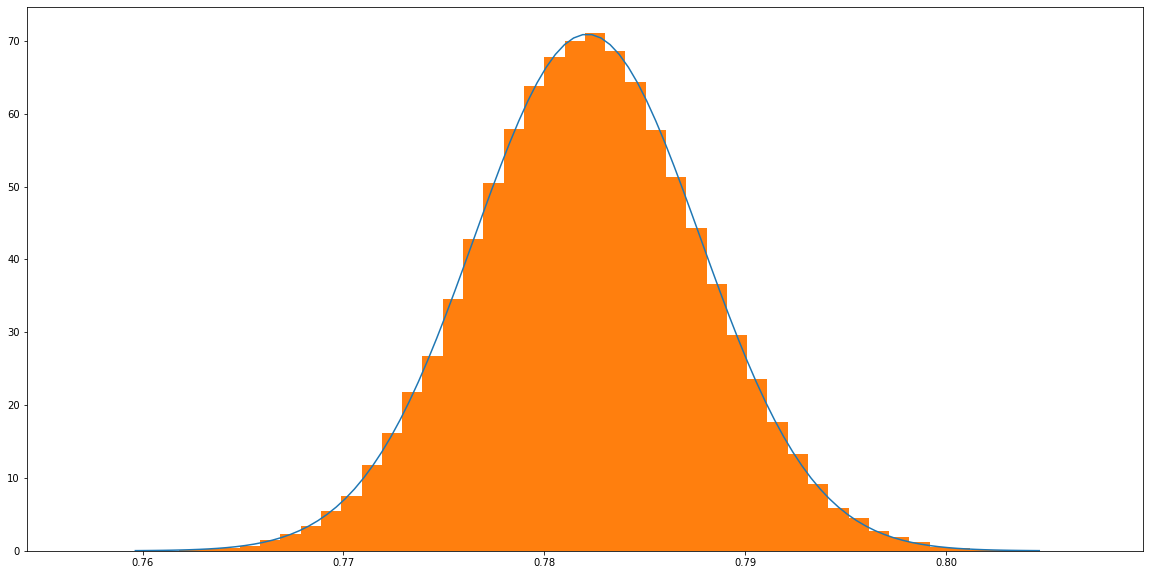

In [22]:
plt.figure(figsize=(20, 10))
x = np.linspace(F - 4 * s_F, F + 4 * s_F, 100)

plt.plot(x, 1/(s_F * (2 * np.pi)**.5) * np.exp(-(x - F)**2 / (2 * s_F**2)))
plt.hist(random_data, bins=50, density=True)

plt.show()

$\displaystyle \text{(d)}$

F = 0.7821445312499998
s_F = 0.5553975829452449


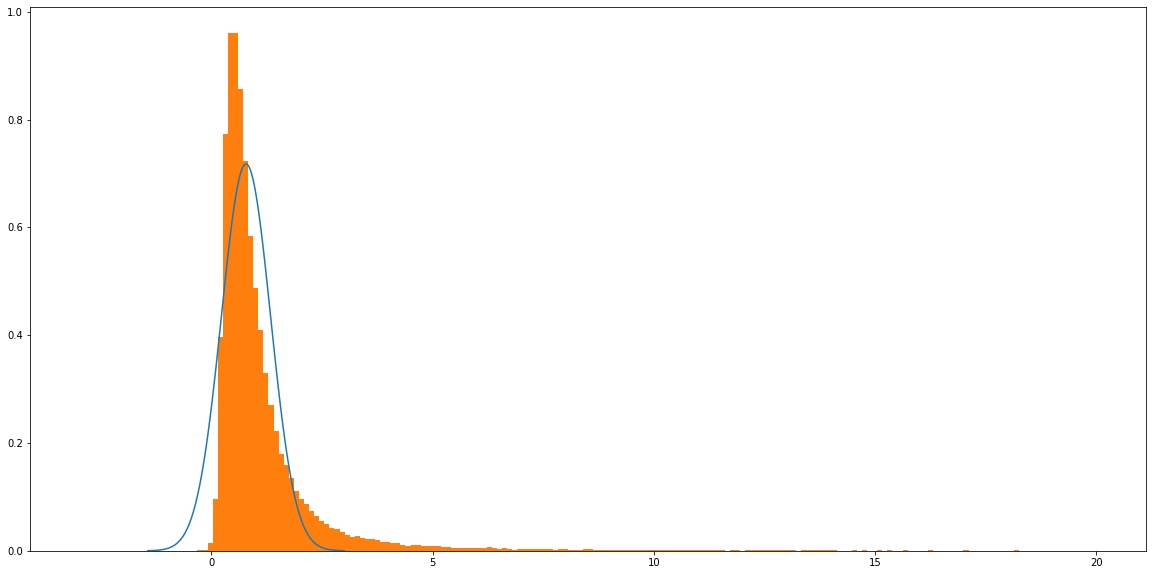

In [23]:
G = 6.67430e-11
s_r = 1
s_m1 = 2e4
s_m2 = 10e4

F = G * m1 * m2 / r**2
s_F = G / r**2 * ((m2 * s_m1)**2 + (m1 * s_m2)**2 + 4 * (m1 * m2 * s_r / r)**2)**.5 
print("F = {0}\ns_F = {1}".format(F, s_F))

################################################################################

random_data = G * np.random.normal(loc=m1, scale=s_m1, size=100000) * \
np.random.normal(loc=m2, scale=s_m2, size=100000) / \
np.random.normal(loc=r, scale=s_r, size=100000)**2
random_data = random_data[random_data<20]
random_data = random_data[-10<random_data]

################################################################################

plt.figure(figsize=(20, 10))
x = np.linspace(F - 4 * s_F, F + 4 * s_F, 100)

plt.plot(x, 1/(s_F * (2 * np.pi)**.5) * np.exp(-(x - F)**2 / (2 * s_F**2)))
plt.hist(random_data, bins=200, density=True)

plt.show()